> # ENTRO

In [1]:
#entro

In [ ]:
#entro

In [ ]:
#entro

> # CODE

# Import  Libraries 

In [28]:
import os
import shutil
import pandas as pd

# Get & Adjust Data

In [29]:
# datasets directorys
cancer_rays_dir     = os.listdir("Desktop\\final_proj\\breast_hostopathology_images_dataset\\") 
all_rays_dir        = "Desktop\\final_proj\\all_rays_dir" 
cancer_rays_dir_str ="Desktop\\final_proj\\breast_hostopathology_images_dataset\\"

In [5]:
print(cancer_rays_dir)
print(len(cancer_rays_dir))

['10253', '10254', '10255', '10256', '10257', '10258', '10259', '10260', '10261', '10262', '10264', '10268', '10269', '10272', '10273', '10274', '10275', '10276', '10277', '10278', '10279', '10282', '10285', '10286', '10288', '10290', '10291', '10292', '10293', '10295', '10299', '10300', '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '12241', '12242', '12626', '12748', '12749', '12750', '12751', '12752', '12810', '12811', '12817', '12818', '12819', '12820', '12821', '12822', '12823', '12824', '12826', '12867', '12868', '12869', '12870', '12871', '12872', '12873', '12875', '12876', '12877', '12878', '12879', '12880', '12881', '12882', '12883', '12884', '12886', '12890', '12891', '12892', '12893', '12894', '12895', '12896', '12897', '12898', '12900', '12901', '12905', '12906', '12907', '12908', '12909', '12910', '12911', '12929', '12930', '12931', '12932', '12933', '12934', '12935', '12947', '12948', '12949', '12951', '12954', '12955', '13018', '13019', '13020', 

In [30]:
os.mkdir(all_rays_dir)
all_rays_dir_lst = os.listdir('Desktop\\final_proj\\all_rays_dir')

In [21]:
for patient in cancer_rays_dir:   
    path_0 = cancer_rays_dir_str + str(patient) + '/0'
    path_1 = cancer_rays_dir_str + str(patient) + '/1'
    file_list_0 = os.listdir(path_0)   
    file_list_1 = os.listdir(path_1)
    for fname in file_list_0:
            src = os.path.join(path_0, fname)
            dst = os.path.join(all_rays_dir, fname)
            shutil.copyfile(src, dst)
    for fname in file_list_1:
        src = os.path.join(path_1, fname)
        dst = os.path.join(all_rays_dir, fname)
        shutil.copyfile(src, dst)

In [31]:
len(all_rays_dir_lst)

277524

In [32]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
data.head()

,image_id
0,10253_idx5_x1001_y1001_class0.png
1,10253_idx5_x1001_y1051_class0.png
2,10253_idx5_x1001_y1101_class0.png
3,10253_idx5_x1001_y1151_class0.png
4,10253_idx5_x1001_y1201_class0.png


In [33]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head(10)

,image_id,target
0,10253_idx5_x1001_y1001_class0.png,0
1,10253_idx5_x1001_y1051_class0.png,0
2,10253_idx5_x1001_y1101_class0.png,0
3,10253_idx5_x1001_y1151_class0.png,0
4,10253_idx5_x1001_y1201_class0.png,0
5,10253_idx5_x1001_y1251_class0.png,0
6,10253_idx5_x1001_y1301_class0.png,0
7,10253_idx5_x1001_y1351_class0.png,0
8,10253_idx5_x1001_y1501_class0.png,0
9,10253_idx5_x1001_y1551_class0.png,0


In [34]:
data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

# Image Processing 

In [35]:
##

# data spliting

In [36]:
from sklearn.model_selection import train_test_split
y = data['target']
data_train, data_test = train_test_split(data, test_size=0.10, random_state=101, stratify=y)

In [37]:
print(data_train.shape)
print(data_test.shape)

(249771, 2)
(27753, 2)


In [39]:
os.mkdir( 'Desktop\\final_proj\\train_dir')
os.mkdir('Desktop\\final_proj\\test_dir')

In [21]:
os.mkdir( 'Desktop\\final_proj\\train_dir\\zeros')
os.mkdir( 'Desktop\\final_proj\\train_dir\\ones')

os.mkdir( 'Desktop\\final_proj\\test_dir\\zeros')
os.mkdir( 'Desktop\\final_proj\\test_dir\\ones')


In [40]:
train = data_train.image_id
test  = data_test.image_id


In [44]:
data.set_index('image_id', inplace=True)
for image in train:
    fname = image
    target = data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Desktop\\final_proj\\train_dir', label, fname)
    shutil.move(src, dst)

In [46]:
for image in test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("Desktop\\final_proj\\test_dir", label, fname)
    shutil.move(src, dst)


In [48]:
print(len(os.listdir('Desktop\\final_proj\\train_dir\\zeros')))
print(len(os.listdir('Desktop\\final_proj\\train_dir\\ones')))
print(len(os.listdir('Desktop\\final_proj\\test_dir\\zeros')))
print(len(os.listdir('Desktop\\final_proj\\test_dir\\ones')))

178864
70907
19874
7879


# data generation

In [54]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [57]:
data_generation = ImageDataGenerator(rescale=1.0/255)

In [58]:
train_generation = data_generation.flow_from_directory("Desktop\\final_proj\\train_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')
test_generation = data_generation.flow_from_directory("Desktop\\final_proj\\test_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')



Found 249771 images belonging to 2 classes.
Found 27753 images belonging to 2 classes.


# modeling

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [67]:
my_model =Sequential()
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(MaxPool2D(pool_size=(2,2)))


my_model.add(Flatten())

my_model.add(Dense(128,activation='relu'))

my_model.add(Dense(2,activation='softmax'))

my_model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [68]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [69]:
my_model.fit_generator(train_generation, 
                    validation_data=test_generation,
                    epochs=60, verbose=1,
                   callbacks=early_stop)

Epoch 1/60
24978/24978 [==============================] - 1448s 58ms/step - loss: 0.4198 - accuracy: 0.8158 - val_loss: 0.3896 - val_accuracy: 0.8305
Epoch 2/60
24978/24978 [==============================] - 282s 11ms/step - loss: 0.3824 - accuracy: 0.8362 - val_loss: 0.3625 - val_accuracy: 0.8445
Epoch 3/60
24978/24978 [==============================] - 266s 11ms/step - loss: 0.3713 - accuracy: 0.8412 - val_loss: 0.3648 - val_accuracy: 0.8412
Epoch 4/60
24978/24978 [==============================] - 249s 10ms/step - loss: 0.3636 - accuracy: 0.8445 - val_loss: 0.3512 - val_accuracy: 0.8470
Epoch 5/60
24978/24978 [==============================] - 320s 13ms/step - loss: 0.3570 - accuracy: 0.8474 - val_loss: 0.3501 - val_accuracy: 0.8514
Epoch 6/60
24978/24978 [==============================] - 829s 33ms/step - loss: 0.3526 - accuracy: 0.8493 - val_loss: 0.3433 - val_accuracy: 0.8504
Epoch 7/60
24978/24978 [==============================] - 823s 33ms/step - loss: 0.3487 - accuracy: 0.850

In [70]:
losse = pd.DataFrame(my_model.history.history)
losse.head()

,loss,accuracy,val_loss,val_accuracy
0,0.419787,0.815783,0.389573,0.830505
1,0.382361,0.836158,0.362486,0.844485
2,0.371320,0.841215,0.364781,0.841206
3,0.363622,0.844510,0.351164,0.847044
4,0.357006,0.847392,0.350107,0.851367


<AxesSubplot:>

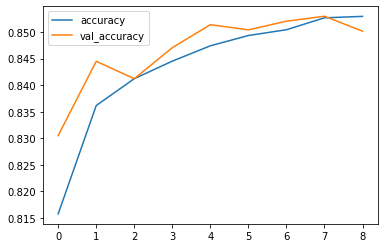

In [71]:
losse[['accuracy','val_accuracy']].plot()


<AxesSubplot:>

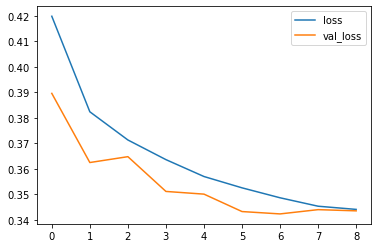

In [72]:
losse[['loss','val_loss']].plot()
